In [135]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font_scale=1.56)
from sklearn.ensemble import RandomForestClassifier
import warnings
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
df_data = titanic_train.append(titanic_test )

c:\users\qq\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [95]:
df_data.head()
#passengerid = 乘客ID
#Pclass = 座艙等級(1/2/3)
#Sex = 性別
#Age = 年齡
#Sib Sp =堂兄弟/妹個數
#Parch = 父母與小孩個數
#Ticket = 船票訊息
#Fare = 票價
#Cabin =客艙
#Embarked = 登船港口

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [81]:
titanic_train.info()
#可發現AGE，CABRIN，Embarked有遺漏

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [82]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


由下圖可發現，女性存活比例較高

,Sex,Survived
0,female,0.742
1,male,0.189


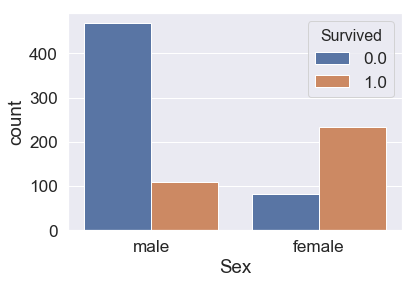

In [85]:
sns.countplot(df_data['Sex'], hue=df_data['Survived'])
df_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False ).mean().round(3)


由圖可發現船艙等級越高，存活率相對越高

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


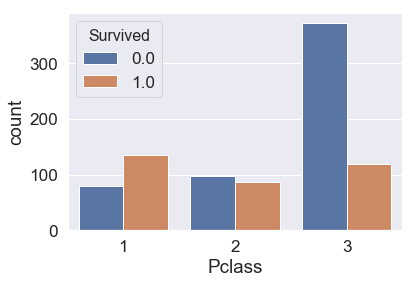

In [86]:
sns.countplot(df_data['Pclass'],hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False ).mean().round(3)

S港出發存活率較低

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


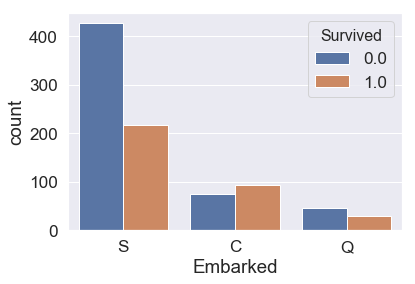

In [96]:
sns.countplot(df_data['Embarked'],hue=df_data['Survived'])
df_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False ).mean().round(3)

由圖可發現 年齡小於4歲生存率高
在15到25歲間存活率低
大部分乘客都在15~35歲間

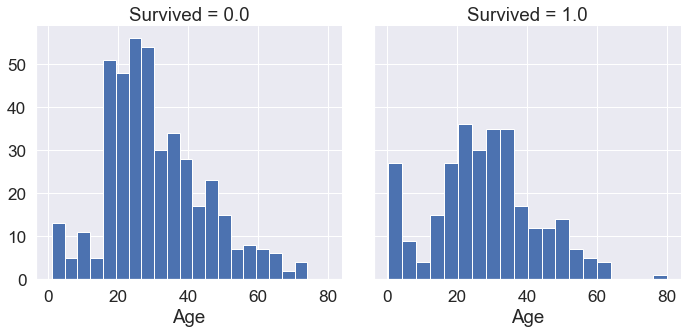

In [97]:
g = sns.FacetGrid(df_data, col='Survived',size =5)
g.map(plt.hist, 'Age', bins=20)

低票價乘客死亡率高出許多

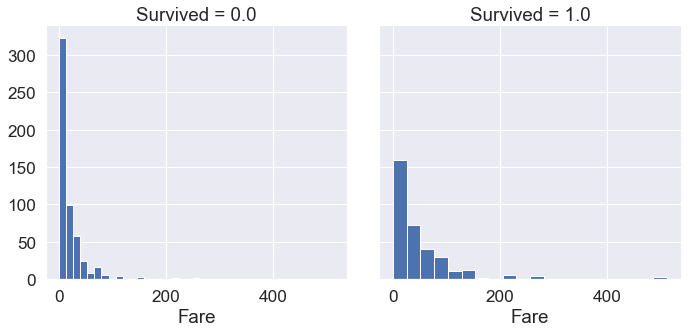

In [89]:
g = sns.FacetGrid(df_data, col='Survived',size =5)
g.map(plt.hist, 'Fare', bins=20)

由表中發現 獨自來的人的生存率皆比有跟兄弟姊妹或有父母小孩人還來的低

In [90]:
x=df_data[["SibSp", "Survived"]].groupby(["SibSp"],as_index=False ).mean().round(3)
y=df_data[["Parch", "Survived"]].groupby(["Parch"],as_index=False ).mean().round(3)
print(x)
print(y)

   SibSp  Survived
0      0     0.345
1      1     0.536
2      2     0.464
3      3     0.250
4      4     0.167
5      5     0.000
6      8     0.000
   Parch  Survived
0      0     0.344
1      1     0.551
2      2     0.500
3      3     0.600
4      4     0.000
5      5     0.200
6      6     0.000
7      9       NaN


可發現獨立項有929項，代表乘客票根可能相同

In [91]:
df_data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

建立家庭人數特徵(sibSp+Parch+1)

In [107]:
df_data['Family_size']=df_data['SibSp']+df_data['Parch']+1

In [111]:
#將AGE以中位數來填補
df_data['Age'] = df_data['Age'].fillna(df_data['Age'].median())
#將Fare以平均數來填補
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].mean())
#將Embarked 以S來填補
df_data['Embarked'] =titanic_train['Embarked'].fillna('S')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
Age              1309 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Family_size      1309 non-null int64
Sex_Code         1309 non-null int32
Embarked_Code    1309 non-null int32
dtypes: float64(3), int32(2), int64(5), object(5)
memory usage: 153.4+ KB


In [110]:
#將資料轉換為數字
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
df_data['Embarked_Code'] = df_data['Embarked'].map({'S' : 0,'Q':1, 'C' : 2}).astype('int')

In [113]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(titanic_train)]
df_test = df_data[len(titanic_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [140]:
#建立 RandomForest 模型
an1 = ['Sex_Code','Pclass','Embarked_Code','Family_size']
Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Model.fit(X[an1], Y)
print('minor oob score :%.5f' %(Model.oob_score_))

minor oob score :0.78788


In [141]:
#an2 再加上Age
an2 = ['Sex_Code','Pclass','Embarked_Code','Family_size','Age']
Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Model.fit(X[an2], Y)
print('minor oob score :%.5f' %(Model.oob_score_))

minor oob score :0.80920


In [152]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X[an2], Y, test_size = 0.3)

Model.fit(train_X, train_y)
Y_pred = Model.predict(test_X)
Model.score(train_X, train_y)

0.8587479935794543

In [143]:
# 建立模型 logit
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, train_y)
logistic_regr.predict(test_X)
logistic_regr.score(test_X,test_y)


c:\users\qq\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8470149253731343

In [145]:
# 建立 SVC 模型
svc = svm.SVC()
svc_fit = svc.fit(train_X, train_y)

# 預測
test_y_predicted = svc.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.8134328358208955


c:\users\qq\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
